# <font color='blue'>Problema de Estatística: Média de açúcar em refrigerentes</font>

# 1 - Definindo o problema de negócio

### Um fabricante de refrigerantes afirma que a média de açúcar em seus refrigerantes é de 35 gramas por lata. Um grupo de consumidores desconfia dessa afirmação e decide realizar um teste para verificar se a quantidade média de açúcar é realmente diferente de 35 gramas por lata. Eles coletam uma amostra aleatória de 30 latas de refrigerante e medem a quantidade de açúcar em cada uma delas. Com base nesses dados, eles desejam realizar um teste de hipótese para confirmar ou refutar a afirmação do fabricante.

# 2 - Decisões

### O problema de negócio é estatístico. Com os dados iniciais das amostras, podemos obter a média amostral e o desvio padrão amostral. Com estes valores podemos aplicar um teste t de Student para uma amostra, pois estamos testando uma média populacional.


# 3 - Versão python e import dos pacotes utilizados

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [16]:
#!pip install keras==2.13.1
#!pip install tensorflow==2.13.0
#!pip install --upgrade numpy

     ---------------------------------------- 60.9/60.9 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 16.5/16.5 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.0 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.0 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.0.0 which is incompatible.
ydata-profiling 0.0.dev0 requires matplotlib<3.7,>=3.2, but you have matplotlib 3.7.1 which is incompatible.
ydata-profiling 0.0.dev0 requires multimethod<1.10,>=1.4, but you have multimethod 1.10 which is incompatible.
ydata-profiling 0.0.dev0 requires numpy<1.24,>=1.16.0, but you have numpy 2.0.0 which is incompatible.
ydata-profiling 0.0.dev0 requires requests<2.29,>=2.24.0, but you have requests 2.31.0 wh

In [17]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import kstest, norm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [18]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Danilo Temerloglou de Abreu" --iversions

Author: Danilo Temerloglou de Abreu

scipy     : 1.9.1
numpy     : 2.0.0
matplotlib: 3.7.1



# 4 - Criando os Conjuntos de dados

In [19]:
# Dados amostrais (quantidade de açúcar em gramas por lata)
amostra1 = np.array([34.2, 36.5, 35.1, 34.8, 35.5, 34.9, 35.3, 36.1, 34.7, 35.8,
                    35.2, 34.6, 35.4, 34.9, 35.6, 34.8, 35.7, 35.2, 35.0, 35.3,
                    34.9, 35.5, 34.7, 35.9, 35.6, 35.3, 35.1, 35.4, 36.0, 34.5])

In [20]:
# Definindo os parâmetros da distribuição
media = 35  # média
desvio_padrao = 1  # desvio padrão

# Gerando 10000 amostras aleatórias de uma distribuição normal
amostra2 = np.random.normal(loc=media, scale=desvio_padrao, size=5000)

# 5 - Verificando as suposições, para saber se aplicamos testes paramétricos ou não paramétricos
# Para o teste t de uma amostra:

## 5.1 Dados são numericamente contínuos

In [21]:
primeiras_10_amostras1 = amostra1[:10]
print(primeiras_10_amostras1)

[34.2 36.5 35.1 34.8 35.5 34.9 35.3 36.1 34.7 35.8]


In [22]:
primeiras_10_amostras2 = amostra1[:10]
print(primeiras_10_amostras2)

[34.2 36.5 35.1 34.8 35.5 34.9 35.3 36.1 34.7 35.8]


### Nas duas amostragens temos dados numericamente contínuos

## 5.2 Amostra aleatória

### As duas amostragens são aleatórias

## 5.3 Normalidade dos dados

### Utilizamos o teste de Shapiro-Wilk para avaliar a normalidade dos dados

In [23]:
# Realizando o teste de Shapiro-Wilk
stat_shapiro, p_value = shapiro(amostra1)

# Conclusão do teste
alpha = 0.05
print(f'Estatística de teste Shapiro-Wilk: {stat_shapiro:.4f}')
print(f'Valor-p: {p_value:.4f}')

if p_value > alpha:
    print('Os dados parecem ser normais (falha em rejeitar H0)')
else:
    print('Os dados não parecem ser normais (rejeição de H0)')

Estatística de teste Shapiro-Wilk: 0.9906
Valor-p: 0.9937
Os dados parecem ser normais (falha em rejeitar H0)


In [24]:
# Realizando o teste de Shapiro-Wilk
stat_shapiro, p_value = shapiro(amostra2)

# Conclusão do teste
alpha = 0.05
print(f'Estatística de teste Shapiro-Wilk: {stat_shapiro:.4f}')
print(f'Valor-p: {p_value:.4f}')

if p_value > alpha:
    print('Os dados parecem ser normais (falha em rejeitar H0)')
else:
    print('Os dados não parecem ser normais (rejeição de H0)')

Estatística de teste Shapiro-Wilk: 0.9994
Valor-p: 0.0821
Os dados parecem ser normais (falha em rejeitar H0)


### As 2 amostragens atendem as suposições para utilizarmos o teste t de Student para nosso teste de hipóteses.

# 6 - Teste de hipóteses

## 6.1 Amostragem 1

In [25]:
# Parâmetros do problema
mu_0 = 35  # média sob a hipótese nula
alpha = 0.05  # nível de significância

# Calculando estatísticas amostrais
media_amostral = np.mean(amostra1)
desvio_padrao_amostral = np.std(amostra1, ddof=1)  # ddof=1 para usar desvio padrão amostral

# Calculando o valor do teste t
n = len(amostra1)
t_stat = (media_amostral - mu_0) / (desvio_padrao_amostral / np.sqrt(n))

# Calculando o valor crítico da distribuição t de Student
graus_de_liberdade = n - 1
t_critico = stats.t.ppf(1 - alpha/2, graus_de_liberdade)  # para teste bilateral

# Tomando a decisão estatística
if np.abs(t_stat) > t_critico:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

print(f"Valor do teste t: {t_stat}")
print(f"Valor crítico t: {t_critico}")

Rejeitamos a hipótese nula.
Valor do teste t: 2.644535711960193
Valor crítico t: 2.045229642132703


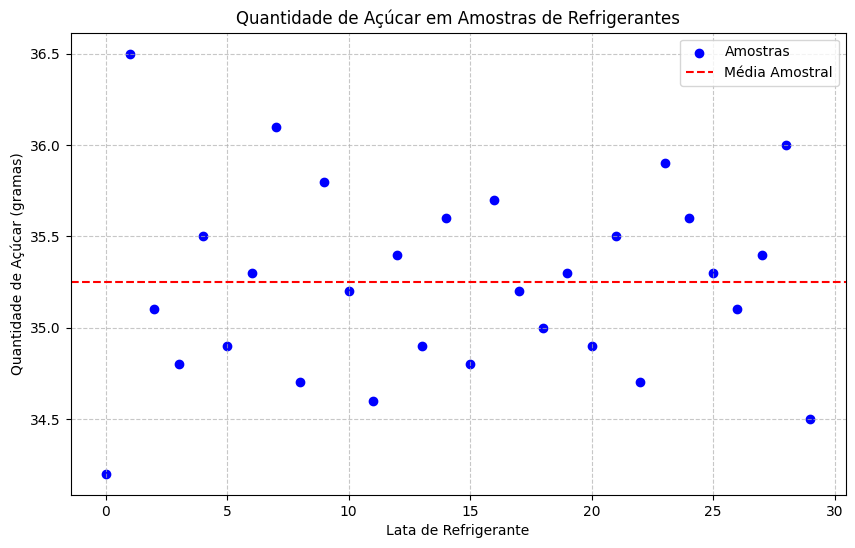

In [26]:
# Visualizando as amostras
# Preparando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(amostra1)), amostra1, color='blue', label='Amostras')

# Adicionando linha para a média amostral
plt.axhline(y=np.mean(amostra1), color='red', linestyle='--', label='Média Amostral')

plt.title('Quantidade de Açúcar em Amostras de Refrigerantes')
plt.xlabel('Lata de Refrigerante')
plt.ylabel('Quantidade de Açúcar (gramas)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## 6.2 Amostragem 2

In [27]:
# Parâmetros do problema
mu_0 = 35  # média sob a hipótese nula
alpha = 0.05  # nível de significância

# Calculando estatísticas amostrais
media_amostral = np.mean(amostra2)
desvio_padrao_amostral = np.std(amostra2, ddof=1)  # ddof=1 para usar desvio padrão amostral

# Calculando o valor do teste t
n = len(amostra2)
t_stat = (media_amostral - mu_0) / (desvio_padrao_amostral / np.sqrt(n))

# Calculando o valor crítico da distribuição t de Student
graus_de_liberdade = n - 1
t_critico = stats.t.ppf(1 - alpha/2, graus_de_liberdade)  # para teste bilateral

# Tomando a decisão estatística
if np.abs(t_stat) > t_critico:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

print(f"Valor do teste t: {t_stat}")
print(f"Valor crítico t: {t_critico}")

Não rejeitamos a hipótese nula.
Valor do teste t: -0.6003865332707896
Valor crítico t: 1.9604386466615242


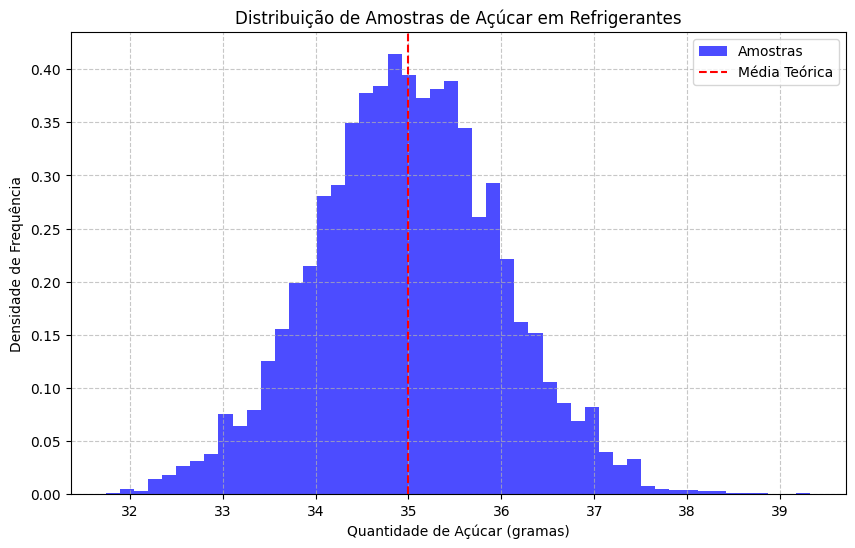

In [28]:
# Preparando o gráfico de densidade de frequência
plt.figure(figsize=(10, 6))
plt.hist(amostra2, bins=50, density=True, color='blue', alpha=0.7, label='Amostras')

# Adicionando linha para a média teórica
plt.axvline(x=media, color='red', linestyle='--', label='Média Teórica')

plt.title('Distribuição de Amostras de Açúcar em Refrigerantes')
plt.xlabel('Quantidade de Açúcar (gramas)')
plt.ylabel('Densidade de Frequência')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Conclusão: 
### Na amostragem 1, rejeitamos a hipótese nula. 
### Há evidências estatísticas de que a média de açúcar é diferente de 35 gramas por lata.
### Porém, devido à quantidade pequena de amostras pode não ser uma boa conclusão.
### Na amostragem 2, não rejeitamos a hipótese nula.
### Não há evidências suficientes para afirmar que a média de açúcar é diferente de 35 gramas por lata.
### Lembrando que geramos os dados de uma distribuição normal nesta amostragem 2 e portanto esperava-se esse resultado.

# Fim